<a href="https://colab.research.google.com/github/Kashishsingla111/Multi-Threading_Kashish_102117150/blob/main/Multi_Threading_Kashish_102117150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import threading
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
def matrix_multiply(A, B, result, index):
    result[index] = np.dot(A, B)

In [9]:
def run_with_threads(num_threads):
    start_time = time.time()
    threads = []
    for i, matrix in enumerate(matrices):
        thread = threading.Thread(target=matrix_multiply, args=(A, matrix, results, i))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

In [10]:
A = np.random.rand(1000, 1000) # Constant matrix

results = [None] * 100 # Results of matrix, multiplication

matrices = [np.random.rand(1000, 1000) for _ in range(100)] # random matrices


In [11]:
results_table = []
num_threads=list(range(1,11))
time_taken=[]
for num_t in num_threads:
    ttime= run_with_threads(num_t)
    time_taken.append(ttime)
    results_table.append(("T="+str(num_t), round(ttime,4)))

ans = list(zip(*results_table)) # for row wise

| Threads | Time Taken (Sec) |
|---------|------------------|
| T=1   | 32.30341625213623   |
| T=2   | 15.249638319015503   |
| T=3   | 13.548609256744385   |
| T=4   | 14.594708442687988   |
| T=5   | 13.822733402252197   |
| T=6   | 13.788995027542114   |
| T=7   | 13.474961519241333   |
| T=8   | 13.895618438720703   |


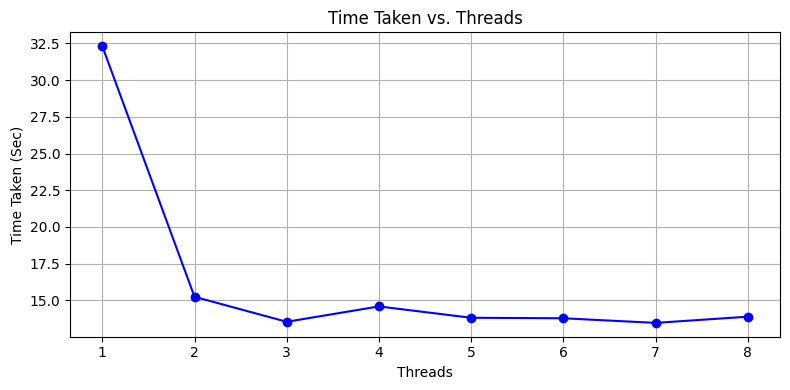

In [16]:
import numpy as np
import time
import multiprocessing as mp

def multiply_matrices(constant_matrix):
    random_matrix = np.random.rand(1000, 1000)
    result = np.dot(random_matrix, constant_matrix)
    return result

def time_taken(num_threads):
    constant_matrix = np.random.rand(1000, 1000)
    start_time = time.time()

    with mp.Pool(processes=num_threads) as pool:
        _ = pool.map(multiply_matrices, [constant_matrix] * 100)

    return time.time() - start_time

if __name__ == "__main__":
    threads = [1, 2, 3, 4, 5, 6, 7, 8]
    time_taken_results = []

    for num_threads in threads:
        time_taken_results.append(time_taken(num_threads))

    # Print the results table
    print("| Threads | Time Taken (Sec) |")
    print("|---------|------------------|")
    for i in range(len(threads)):
        print(f"| T={threads[i]}   | {time_taken_results[i]}   |")

    # Plot the graph
    plt.figure(figsize=(8, 4))
    plt.plot(threads, time_taken_results, marker='o', linestyle='-', color='b')
    plt.title('Time Taken vs. Threads')
    plt.xlabel('Threads')
    plt.ylabel('Time Taken (Sec)')
    plt.grid(True)
    plt.xticks(threads)
    plt.tight_layout()
    plt.show()
